# Generating pixel(s) from an image using CNN with Tesnorflow using keras Wrapper

  Md. Rafiul Amin, PSID 1637374

## Fisrt Step
   import packages used in this jupyter notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Dense, Activation
from keras.models import Model
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot
from matplotlib.pyplot import imshow
%matplotlib inline
np.random.seed(1)

Using TensorFlow backend.


# Second Step
   Define our prediction model using keras API

In [2]:
def PixModel(input_shape=(11,)):
    """
    Implementation of the Generating pixel Model.
    
    Arguments:
    input_shape -- shape of our input x,y,r,z

    Returns:
    model -- a Model() instance in Keras
    
    the default initializer is glorir_uniform for w and zero for b
    """

    X_input = Input(input_shape)
    
    X = Dense(4096, activation='tanh',name='fc1')(X_input)
    X = Dense(2048, activation='tanh',name='fc2')(X)
    X = Dense(1024, activation='tanh',name='fc3')(X)
    X = Dense(3, activation='sigmoid', name='out')(X)
    # Create model. This creates Keras model instance, We'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='PixModel')

    return model

# Third Step
  Create the model defined above.
  Initialize some input data with different x,y,r and latent information vector z

In [3]:
PixModel = PixModel()

In [4]:
data = np.array([[[10,20,5,1,0,0,0,0,0,0,0]],[[1,2,5,1,0,0,0,0,0,0,0]],[[1,2,100,1,0,0,0,0,0,0,0]],[[10,20,5,0,0,0,0,0,0,0,1]],[[1,2,5,0,0,0,0,0,0,0,1]],[[1,2,100,0,0,0,0,0,0,0,1]]])

# Fourth Step
 Generate pixel

In [5]:
pixels=[]
for i in range(data.shape[0]):
    pixels.append(PixModel.predict(data[i]))
pixels=np.array(pixels)

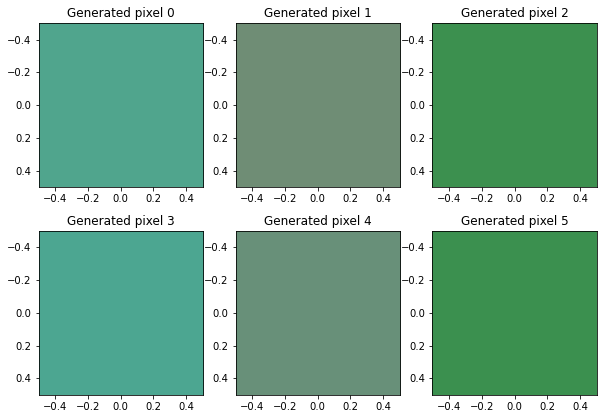

In [6]:
plt.figure(figsize=(10,7))
fig = plt.gcf()
for i in range(len(pixels)):
    plt.subplot(2,3,i+1)
    plt.imshow(pixels[i].reshape(1,1,3))
    plt.title('Generated pixel '+str(i))
plt.show()
fig.savefig('pixel.png', dpi=300, bbox_inches='tight')

### generate images with 8*8

In [13]:
images1=[] 
images2=[] 
images3=[]
images4=[]
images5=[]
images6=[]

for x in range(0, 8):
    for y in range(0, 8):
        r = x**2+y**2
        vect = np.array([[x,y,r,1,0,0,0,0,0,0,0]])
        images1.append(PixModel.predict(vect))
        
        
for x in range(0, 8):
    for y in range(0, 8):
        r = x**2+y**2
        vect = np.array([[x,y,r,1,0,0,0,0,0,0,0]])
        images2.append(PixModel.predict(vect))
        
for x in range(0, 8):
    for y in range(0, 8):
        r = (x/2)**2+(y/2)**2
        vect = np.array([[x,y,r,1,0,0,0,0,0,0,0]])
        images3.append(PixModel.predict(vect))

for x in range(0, 8):
    for y in range(0, 8):
        r = (x/3)**2+(y/3)**2
        vect = np.array([[x,y,r,1,0,0,0,0,0,0,0]])
        images4.append(PixModel.predict(vect))
        
for x in range(0, 8):
    for y in range(0, 8):
        r = (x/4)**2+(y/4)**2
        vect = np.array([[x,y,r,1,0,0,0,0,0,0,0]])
        images5.append(PixModel.predict(vect))
        
for x in range(0, 8):
    for y in range(0, 8):
        r = (x/8)**2+(y/8)**2
        vect = np.array([[x,y,r,1,0,0,0,0,0,0,0]])
        images6.append(PixModel.predict(vect))

images1=np.array(images1)
images2=np.array(images2)
images3=np.array(images3)
images4=np.array(images4)
images5=np.array(images5)
images6=np.array(images6)

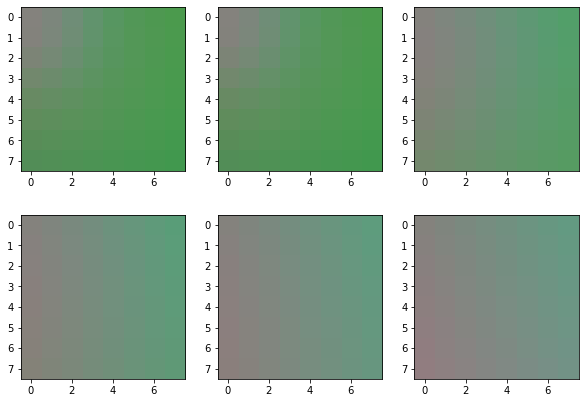

In [14]:
plt.figure(figsize=(10,7))

plt.subplot(2,3,1)
plt.imshow(images1.reshape(8,8,3))
plt.subplot(2,3,2)
plt.imshow(images2.reshape(8,8,3))
plt.subplot(2,3,3)
plt.imshow(images3.reshape(8,8,3))
plt.subplot(2,3,4)
plt.imshow(images4.reshape(8,8,3))
plt.subplot(2,3,5)
plt.imshow(images5.reshape(8,8,3))
plt.subplot(2,3,6)
plt.imshow(images6.reshape(8,8,3))
#plt.title('Generated image '+str(i))
#plt.savefig('image.png', dpi=30000, bbox_inches='tight')
plt.show()

In [9]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Model: "PixModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              49152     
_________________________________________________________________
fc2 (Dense)                  (None, 2048)              8390656   
_________________________________________________________________
fc3 (Dense)                  (None, 1024)              2098176   
_________________________________________________________________
out (Dense)                  (None, 3)                 3075      
Total params: 10,541,059
Trainable params: 10,541,059
Non-trainable params: 0
_________________________________________________________________


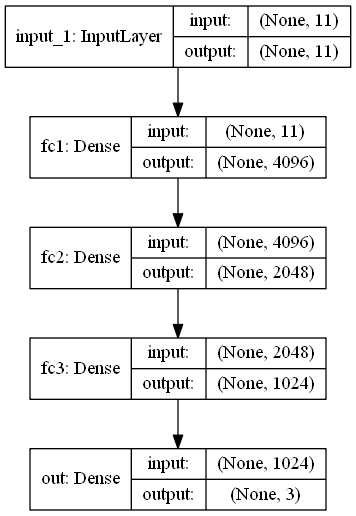

In [10]:
PixModel.summary()
plot_model(PixModel, to_file='PixModel.png', show_shapes=True)

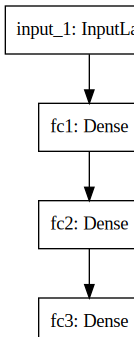

In [11]:
SVG(model_to_dot(PixModel).create(prog='dot', format='svg'))

In [12]:
ImgModel.summary()
plot_model(ImgModel, to_file='ImgModel.png', show_shapes=True)

NameError: name 'ImgModel' is not defined

# End

### test